Датасет `data_bin.csv` містить дані про студентів та підсумкові семестрові оцінки. 

Цільовою змінною є "PASSED" -- приймає два значення 

   * `True` якщо оцінка за семестр є більшою за 10
   * `False` якщо оцінка за семестр є меншою за 11

Файл `attributes.csv` містить повні назви ознак.

Датасет `predict.csv` не містить значень цільової змінної і призначений для зовнішнього оцінювання.  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Завдання 1

[2 бали] 

Імпортувати датасет `data.csv` у об'єкт `DataFrame` і провести попередній аналіз даних засобами `pandas`, `matplotlib`, `seaborn`. 

Цільовою змінною є "PASSED"

In [42]:
df = pd.read_csv('data_bin.csv')

In [4]:
df.dropna(subset=['PASSED'], inplace=True)
df.to_csv('data_bin.csv')

In [57]:
df = df.drop(columns = 'Unnamed: 0.6')

In [58]:
df.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
sem           False
PASSED        False
dtype: bool

In [59]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
939    False
940    False
941    False
942    False
943    False
Length: 944, dtype: bool

In [60]:
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,PASSED
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,True
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,True
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,6,2.493205,True
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,2.493205,True
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,1,1,2,2.312535,True
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,1,1,0,2.714695,True
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,1,1,5,0,2.493205,True


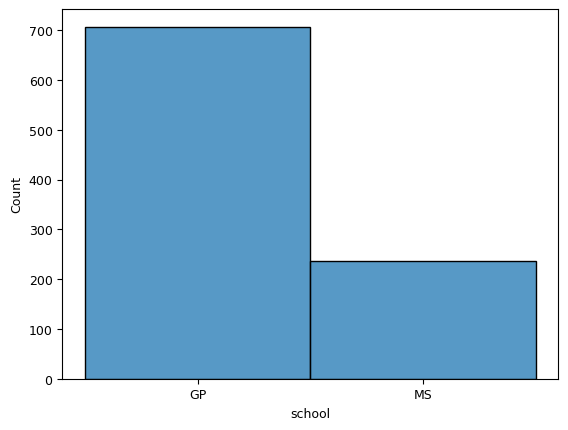

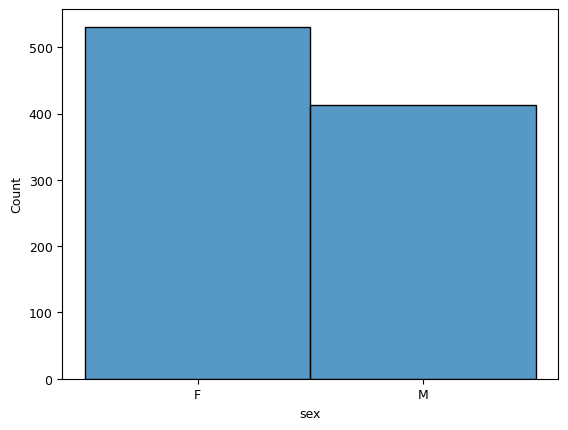

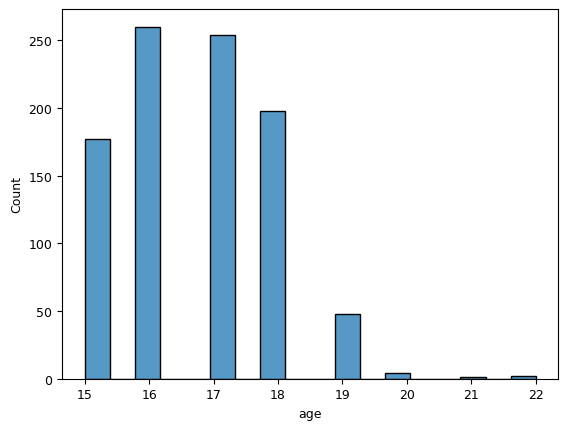

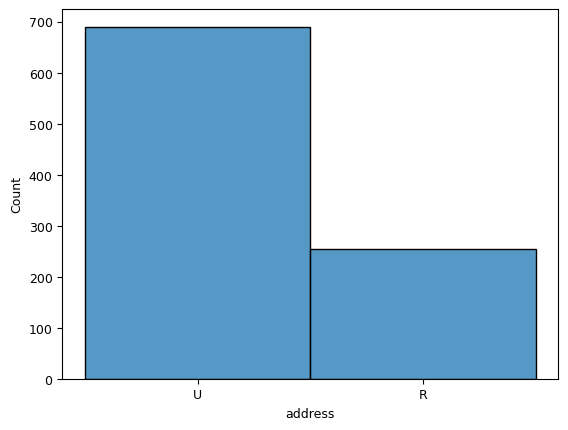

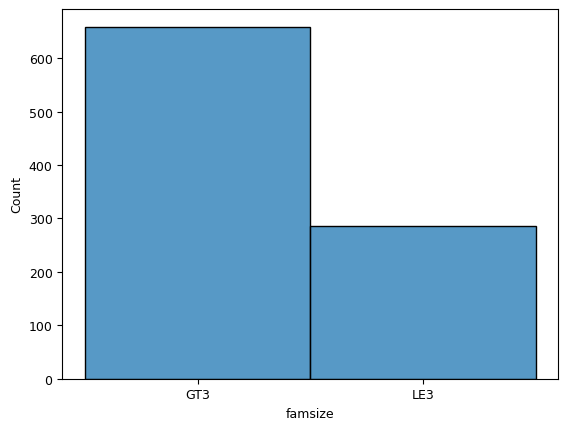

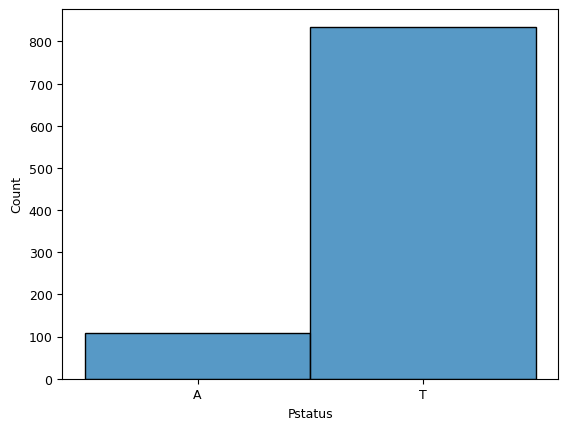

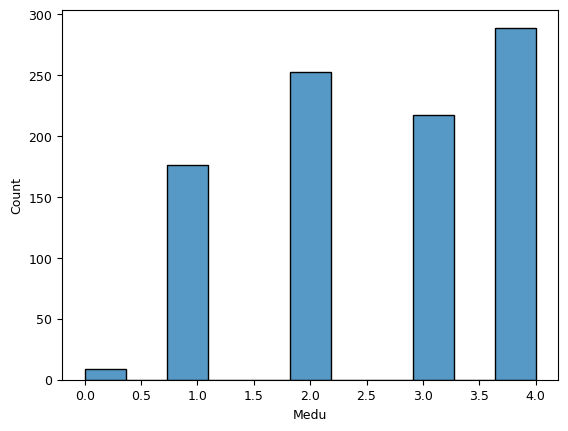

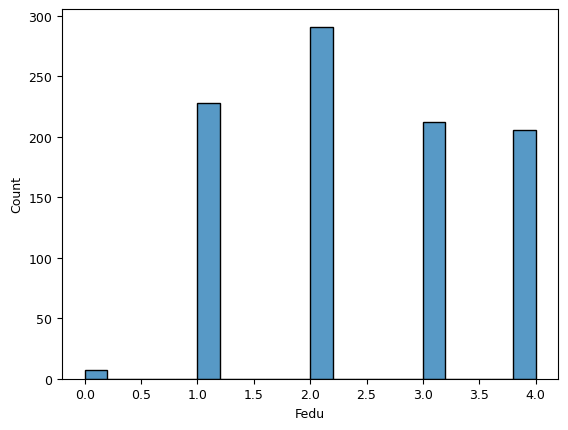

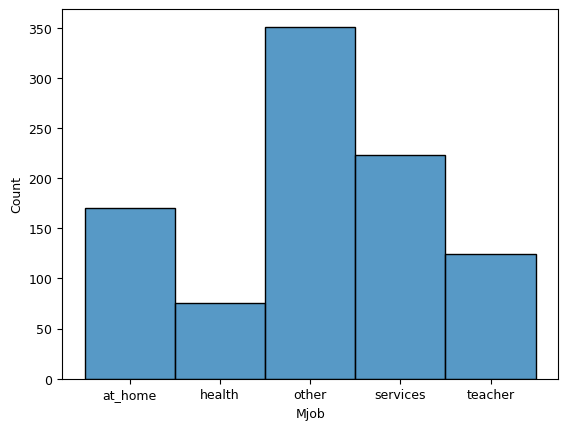

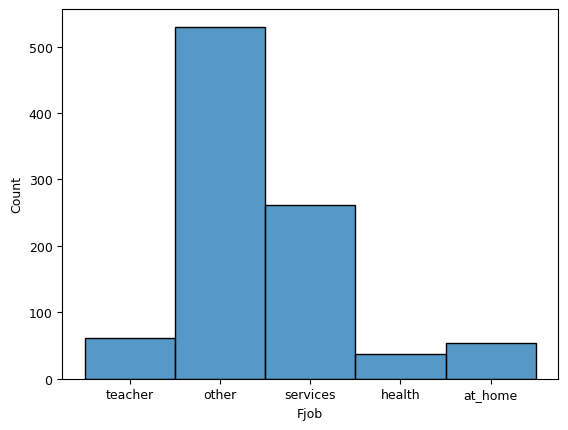

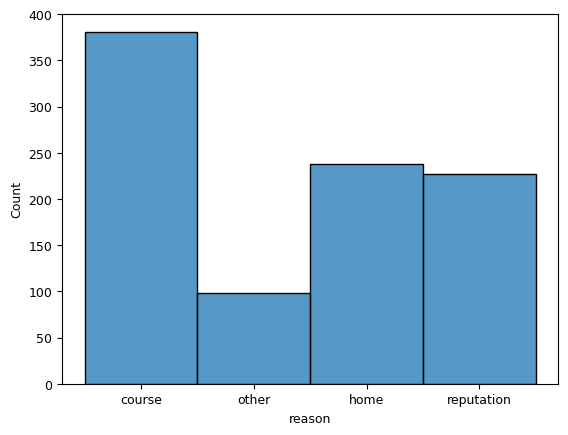

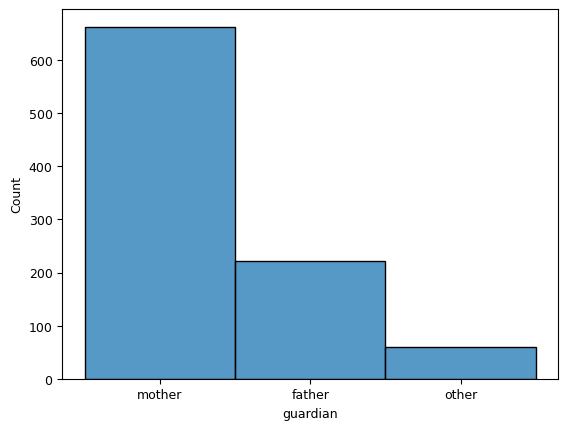

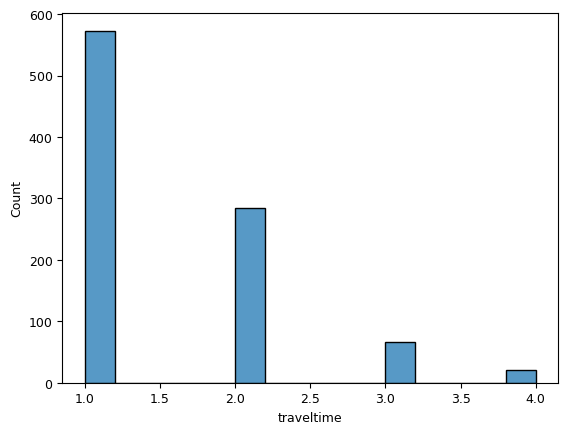

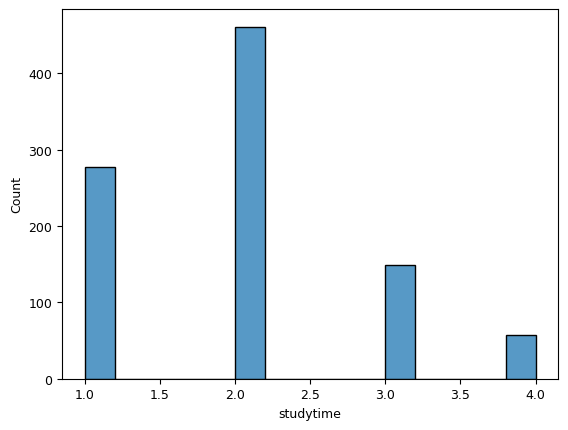

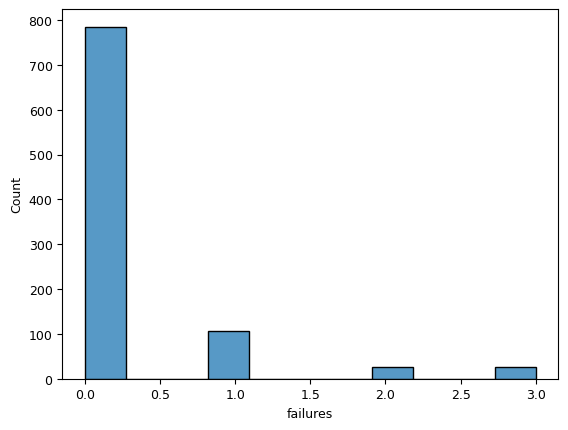

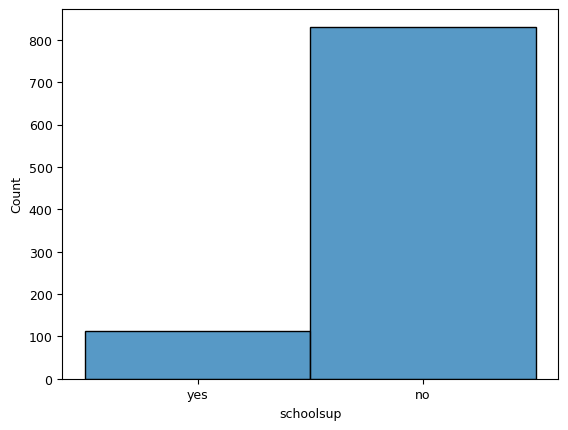

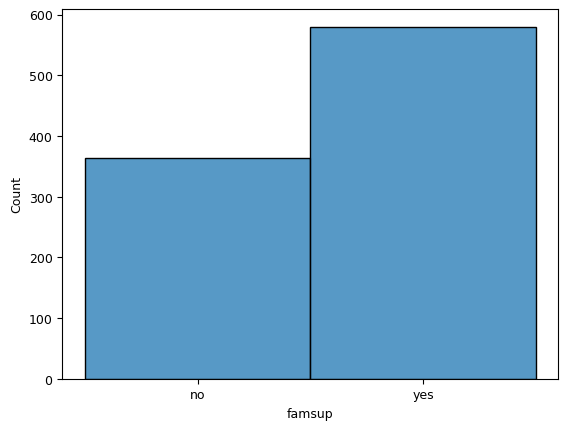

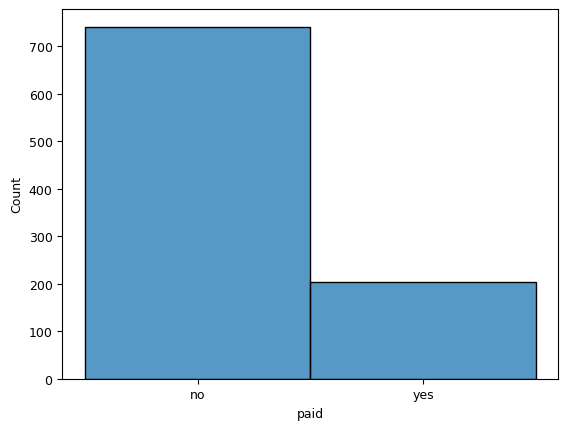

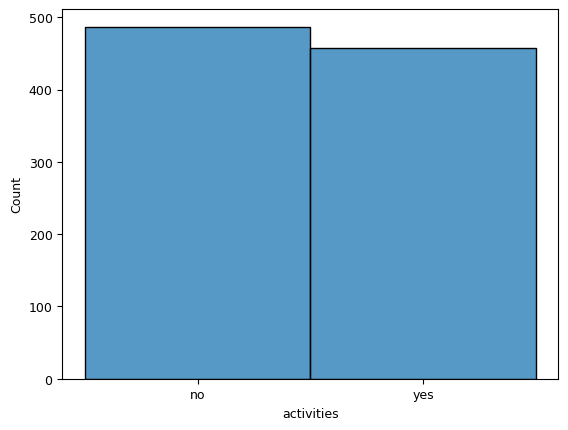

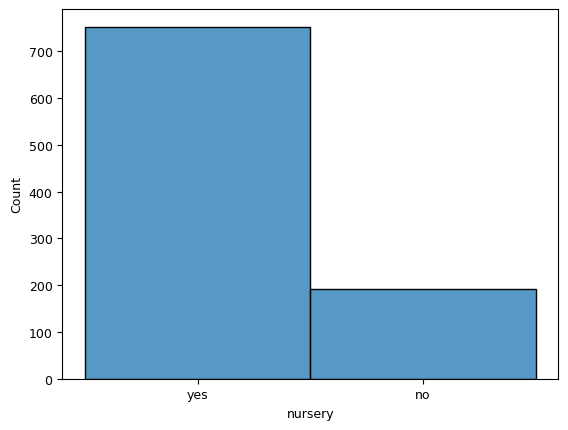

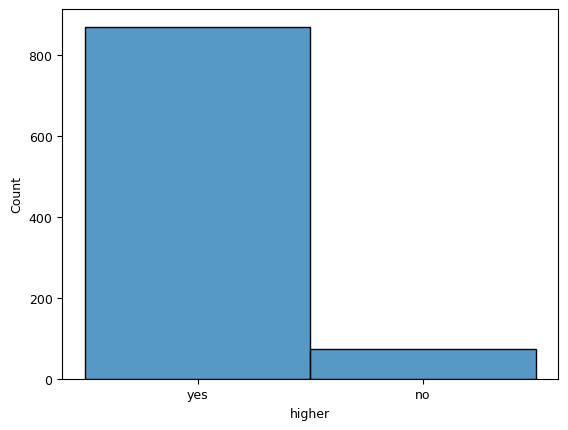

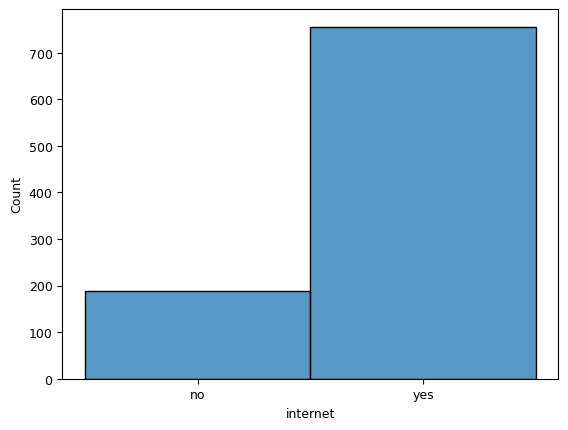

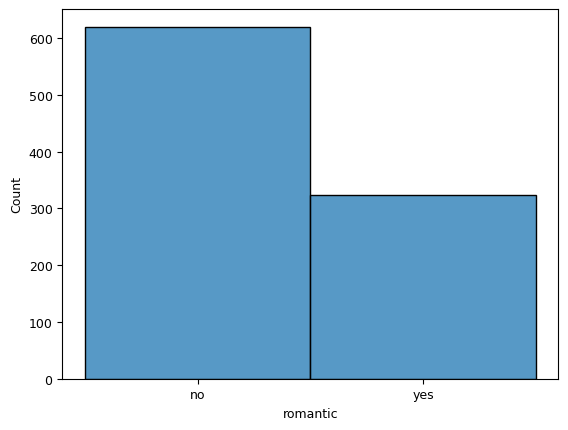

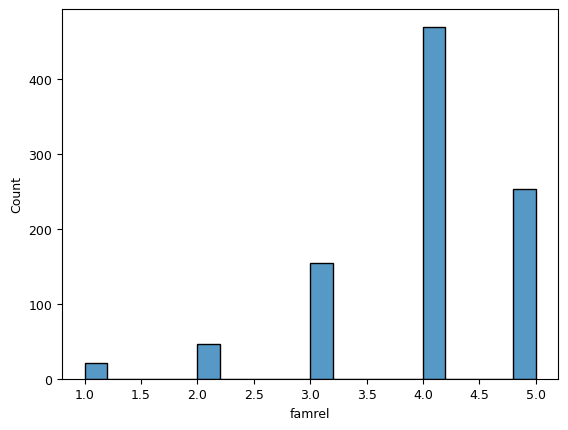

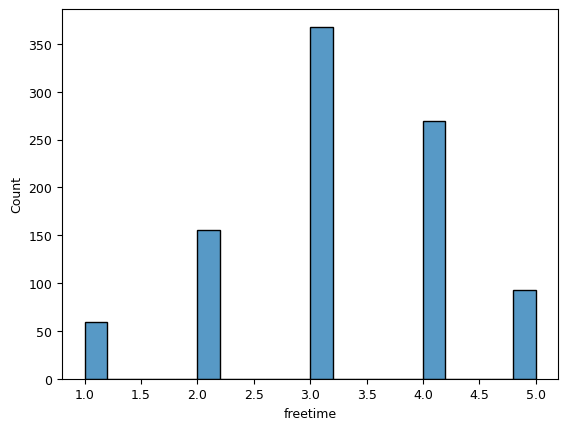

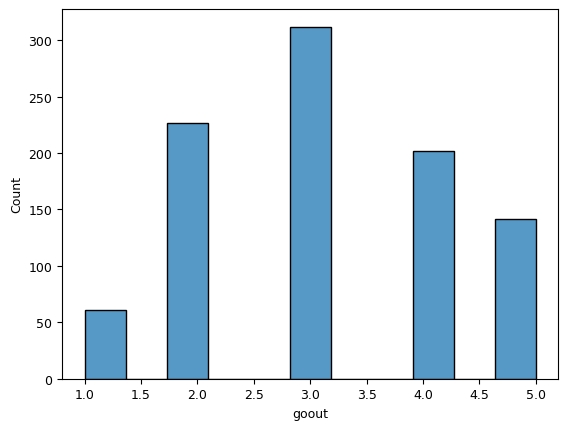

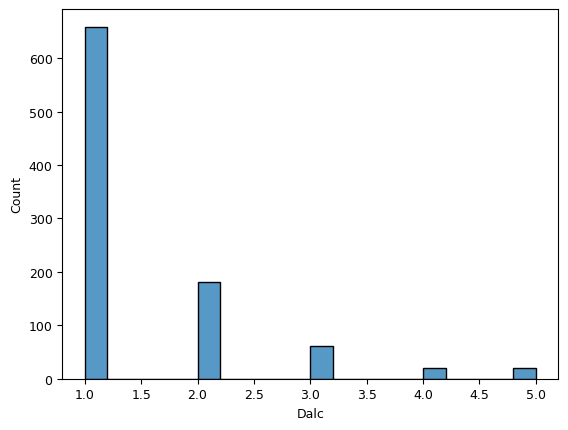

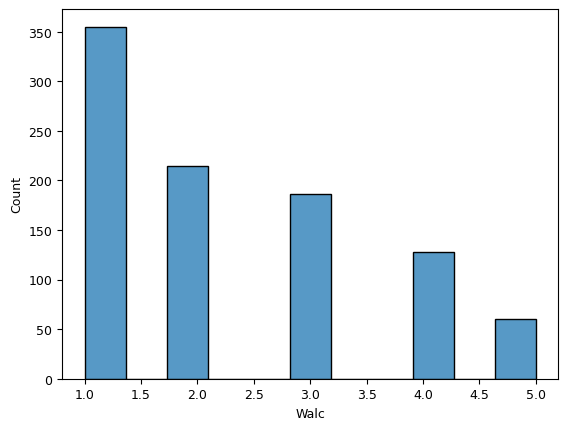

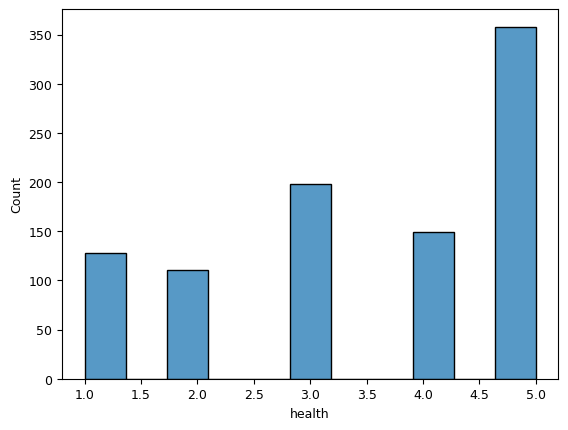

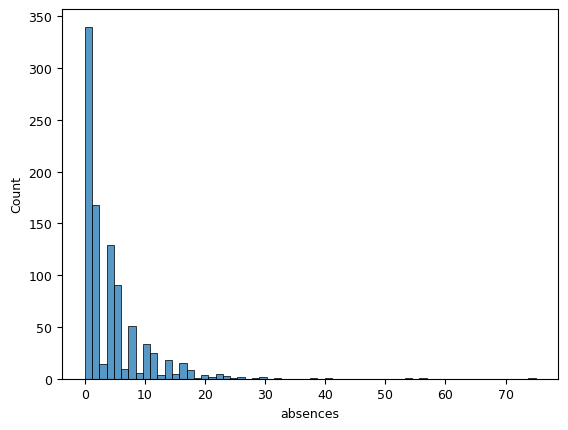

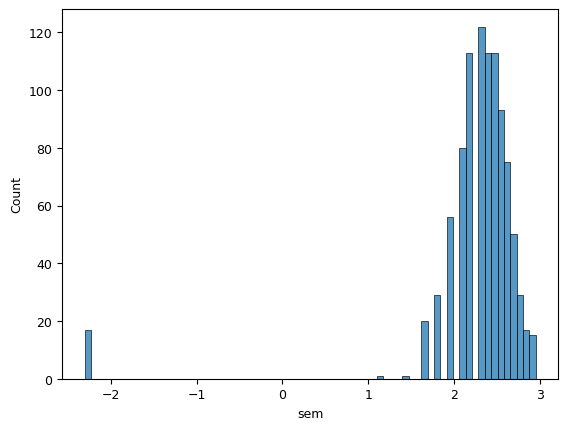

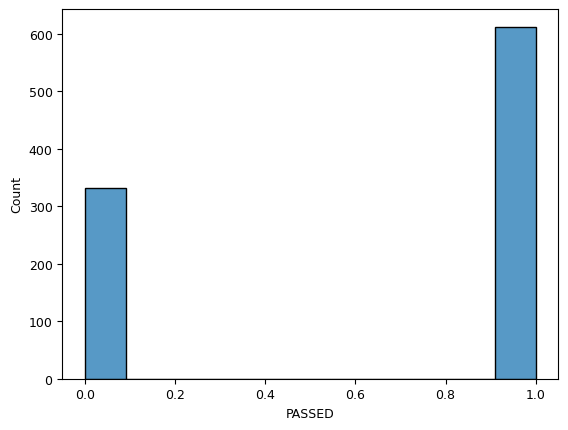

In [61]:
for col in df.columns:
    sns.histplot(data=df, x=col)
    plt.show()

In [62]:
df.shape

(944, 32)

In [63]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'sem', 'PASSED'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      944 non-null    object 
 1   sex         944 non-null    object 
 2   age         944 non-null    int64  
 3   address     944 non-null    object 
 4   famsize     944 non-null    object 
 5   Pstatus     944 non-null    object 
 6   Medu        944 non-null    int64  
 7   Fedu        944 non-null    int64  
 8   Mjob        944 non-null    object 
 9   Fjob        944 non-null    object 
 10  reason      944 non-null    object 
 11  guardian    944 non-null    object 
 12  traveltime  944 non-null    int64  
 13  studytime   944 non-null    int64  
 14  failures    944 non-null    int64  
 15  schoolsup   944 non-null    object 
 16  famsup      944 non-null    object 
 17  paid        944 non-null    object 
 18  activities  944 non-null    object 
 19  nursery     944 non-null    o

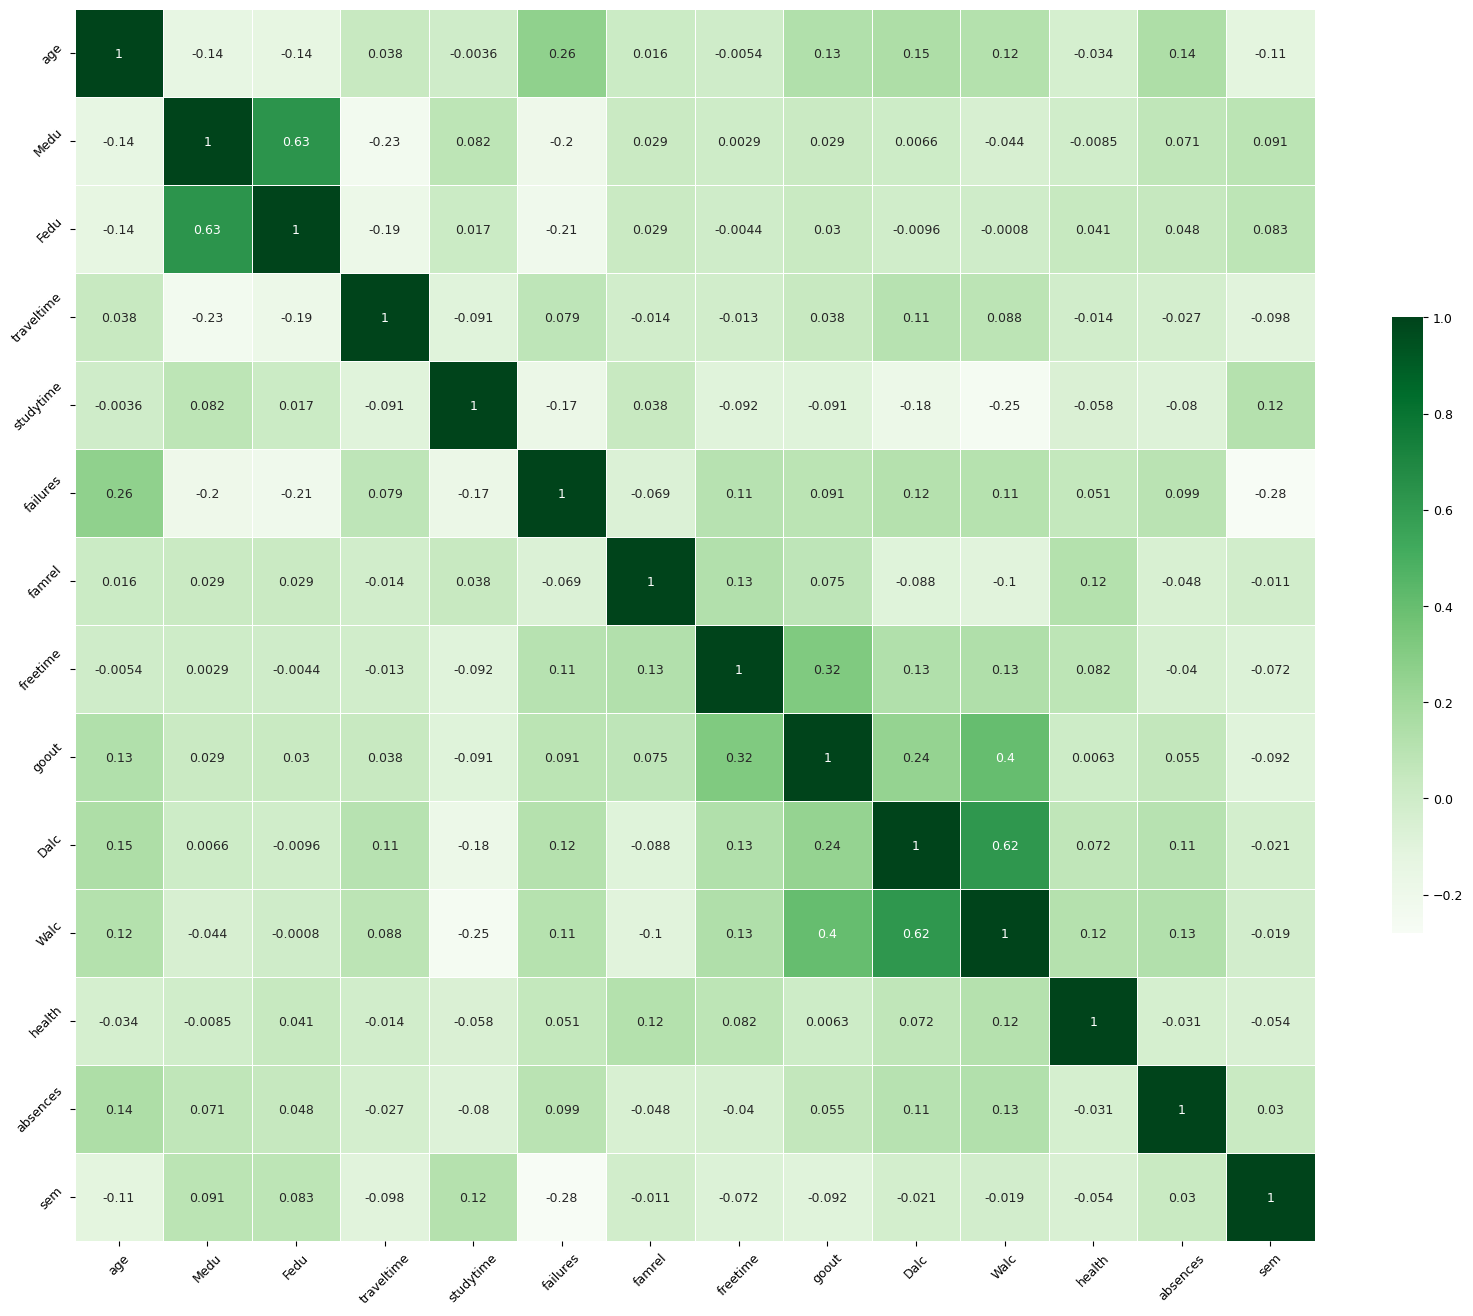

In [65]:
numerical_columns = list(df.select_dtypes(include=['int64', 'float64']))
corr = df[numerical_columns].corr()
plt.rc('font', size=9)
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, cmap = 'Greens')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Завдання 2

[3 бали] 

Навчити модель логістичної регресії (`sklearn.linear_model.LogisticRegression`) лише за числовими ознаками. Дослідити вплив коефіцієнта та типу регуляризації на результат

* Знайти оптимальні параметри коефіцієнта та типу регуляризації (`penalty`, `C`) за допомогою процедури крос-валідації.

* Для всіх моделей знайти середню точність (accuracy) [частку правильних відповідей] на відкладеній вибірці.

* Зробити висновки.

In [66]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
df['PASSED'] = df['PASSED'].astype('category')
df['PASSED'] = df['PASSED'].cat.codes
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,PASSED
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,2.208274,0
940,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,2.646175,1
941,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,2.091864,0
942,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,2.406945,0


In [68]:
df_numeric = df.select_dtypes('number')
df_numeric

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem,PASSED
0,18,4,4,2,2,0,4,3,4,1,1,3,4,-2.302585,1
1,17,1,1,1,2,0,5,3,3,1,1,3,2,2.208274,1
2,15,1,1,1,2,0,4,3,2,2,3,3,6,2.493205,1
3,15,4,2,1,3,0,3,2,2,1,1,5,0,2.646175,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,2.406945,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,20,2,2,1,2,2,5,5,4,4,5,4,11,2.208274,0
940,17,3,1,2,1,0,2,4,5,3,4,2,3,2.646175,1
941,21,1,1,1,1,3,5,5,3,3,3,3,3,2.091864,0
942,18,3,2,3,1,0,4,4,1,3,4,5,0,2.406945,0


# LogisticRegression

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [70]:
y_num = df_numeric['PASSED']
X_num = df_numeric.drop(columns=['PASSED'])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42)

In [72]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], # типи регуляризації
    'C': [0.01, 0.1, 1, 10, 100], # коефіцієнт регуляризації
    'solver': ['saga'], # 'saga' підтримує всі типи регуляризації
    'max_iter': [10000] # щоб забезпечити конвергенцію
}

In [73]:
log_reg = LogisticRegression()

In [74]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [75]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kami\AppData\L

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga']},
             scoring='accuracy', verbose=2)

In [76]:
best_params = grid_search.best_params_
print("Найкращі параметри: ", best_params)

Найкращі параметри:  {'C': 10, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}


In [77]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Середня точність на відкладеній вибірці: ", accuracy)

Середня точність на відкладеній вибірці:  0.8624338624338624


## Висновки

In [78]:
print("Найкраща модель логістичної регресії з параметрами:", best_params)
print(f"Середня точність на відкладеній вибірці становить {accuracy:.4f}")

Найкраща модель логістичної регресії з параметрами: {'C': 10, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}
Середня точність на відкладеній вибірці становить 0.8624


# Завдання 3

[6 балів] 

Навчити модель яка розв'язує задачу двокласової класифікації з використанням усіх ознак.
Використати `sklearn.linear_model.LogisticRegression(solver='saga')` та `sklearn.linear_model.SGDClassifier(loss='log_loss')`.

* Здійснити пошук оптимальних гіперпараметрів моделі використовуючи `GridSearchCV`
    * (`penalty`, `C`) для `LogisticRegression(solver='saga')`
    * (`penalty`, `alpha`, `l1_ratio`, `max_iter`, `learning_rate`) для `SGDClassifier(loss='log_loss')`
* Мета -- отримати якомога кращий результат. 
* Оцінити точність (precision), повноту (recall), F-міру (F1-score), AUC-ROC використовуючи функції з модуля `sklearn.metrics`. 
* Зобразити криві ROC та Precision-Recall для найкращої моделі. 
* Зробити висновки.
    

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc

In [80]:
y = df_numeric['PASSED']
X_numeric = df_numeric.drop(columns=['PASSED'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

In [82]:
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'max_iter': [10000]
}

In [83]:
log_reg = LogisticRegression()

In [84]:
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kami\AppData\L

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga']},
             scoring='f1', verbose=2)

In [85]:
best_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_

In [86]:
param_grid_sgd = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': [0.15, 0.5, 0.85],
    'max_iter': [1000, 10000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

In [87]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)

    print(f"Model: {name}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print()

    # Зображення кривих ROC та Precision-Recall
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall_curve, precision_curve)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

    plt.figure()
    plt.plot(recall_curve, precision_curve, label=f'Precision-Recall curve (area = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend(loc='lower left')
    plt.show()

print("Найкраща модель LogisticRegression з параметрами:", best_params_lr)
print("Найкраща модель SGDClassifier з параметрами:", best_params_sgd)

NameError: name 'models' is not defined

### Обрати найкращу модель яка розв'язує задачу класифікації. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів та ймовірностей зберегти у файл `predictions_clf.csv`.
    


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc

In [ ]:
y_num = df_numeric["PASSED"]
X_num = df_numeric.drop(columns=["PASSED"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42)

In [ ]:
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'max_iter': [10000]
}

In [ ]:
log_reg = LogisticRegression()

In [ ]:
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

In [ ]:
best_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_

In [ ]:
param_grid_sgd = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': [0.15, 0.5, 0.85],
    'max_iter': [1000, 10000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

In [88]:
sgd_clf = SGDClassifier(loss='log_loss')

In [89]:
grid_search_sgd = GridSearchCV(estimator=sgd_clf, param_grid=param_grid_sgd, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kami\AppD

GridSearchCV(cv=5, estimator=SGDClassifier(loss='log_loss'), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'l1_ratio': [0.15, 0.5, 0.85],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'max_iter': [1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1', verbose=2)

In [90]:
best_sgd = grid_search_sgd.best_estimator_
best_params_sgd = grid_search_sgd.best_params_

In [91]:
models = {
    'LogisticRegression': best_lr,
    'SGDClassifier': best_sgd
}

best_model_name = None
best_model = None
best_metrics = {
    'precision': 0,
    'recall': 0,
    'f1': 0,
    'auc_roc': 0
}

In [92]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)

    print(f"Model: {name}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print()

    if f1 > best_metrics['f1']:
        best_model_name = name
        best_model = model
        best_metrics = {
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc_roc': auc_roc
        }

print(f"Найкраща модель: {best_model_name}")
print(f"Precision: {best_metrics['precision']:.4f}")
print(f"Recall: {best_metrics['recall']:.4f}")
print(f"F1-score: {best_metrics['f1']:.4f}")
print(f"AUC-ROC: {best_metrics['auc_roc']:.4f}")

# Прогнози на вибірці predict.csv
predict_df = pd.read_csv('predict.csv')

# Переконаємося, що predict_df має такі самі стовпці, як X_train
missing_cols = set(X_train.columns) - set(predict_df.columns)
for col in missing_cols:
    predict_df[col] = 0  # Або інше значення за замовчуванням

# Переконаємося, що порядок стовпців відповідає X_train
predict_df = predict_df[X_train.columns]

predictions = best_model.predict(predict_df)
probabilities = best_model.predict_proba(predict_df)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(predict_df)

# Збереження
output_df = pd.DataFrame({'Prediction': predictions, 'Probability': probabilities})
output_df.to_csv('predictions_clf.csv', index=False)

print("Прогнози та ймовірності збережено у файл predictions_clf.csv")

Model: LogisticRegression
Precision: 0.8626
Recall: 0.9339
F1-score: 0.8968
AUC-ROC: 0.9446

Model: SGDClassifier
Precision: 0.8042
Recall: 0.9504
F1-score: 0.8712
AUC-ROC: 0.8055

Найкраща модель: LogisticRegression
Precision: 0.8626
Recall: 0.9339
F1-score: 0.8968
AUC-ROC: 0.9446
Прогнози та ймовірності збережено у файл predictions_clf.csv


In [100]:
# Зберегти прогнози у змінну best_clf_model_predictions та ймовірності у best_clf_model_predict_proba
best_clf_model_predictions = best_model.predict(predict_df)
best_clf_model_predict_proba = best_model.predict_proba(predict_df) if hasattr(best_model, "predict_proba") else best_model.decision_function(predict_df)

for t in zip(best_clf_model_predictions, best_clf_model_predict_proba[:,1]):
    print(*t)

0 2.3665652615809896e-12
0 0.1971210231884196
0 0.0984899799281131
0 0.4264139106231729
0 0.03759858428185879
1 0.8476672767844756
0 0.2974348810720263
1 0.8682212006579066
1 0.9385577821080647
0 0.006013388071561003
0 0.07457845330597329
1 0.8871678788261799
0 0.48147954575638585
1 0.5709716269257269
0 0.08659547631678977
1 0.8639414767715481
1 0.9315007020565822
1 0.8805858935191566
1 0.9532799325062042
0 0.038521130169475046
1 0.9767869828973292
0 0.020226979524631997
0 0.019742612271981465
0 0.42517366850781313
1 0.8253901503526503
1 0.9598213385162329
1 0.7222435452410322
1 0.8738429817621164
1 0.9185976473242802
0 0.1477373263896905
1 0.5456367528069272
1 0.926080789805605
0 0.024090549276704586
0 0.31259934830345676
1 0.9108529764783052
1 0.9384396760317796
0 0.05316669511713086
1 0.650577631627791
1 0.9722972728823981
0 0.27447315567715896
1 0.7879349274280011
0 0.08517757212068762
1 0.9648025496697129
0 0.329651521296005
1 0.9398241198896524
1 0.9771394645608971
1 0.6979328501

In [101]:
# Запустити для створення файлу
pd.DataFrame(zip(best_clf_model_predictions, 
                 best_clf_model_predict_proba[:,1]), 
             columns=['preds', 'probas']).to_csv('predictions_clf.csv')



## Завдання 4. 

[1 бал]

Зберегти результати роботи у jupyter-ноутбук. Ноутбук повинен бути збережений у стані в якому усі клітинки запущені і не містити помилок. Формат назви файлу `М2_Прізвище_Ім'я.ipynb`. 

Окремо додати файл `predictions_clf.csv`.

Додатково можна отримати до [4 балів] за порівняннями результатів найкращих моделей завдань 2 та 3.
